In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy

In [9]:
w1 = np.array([[1, -1], [2, -5], [3, -6], [4, -10], [5, -12], [6, -15]])
w2 = np.array([[-1, 1], [-2, 5], [-3, 6], [-4, 10], [-5, 12], [-6, 15]])

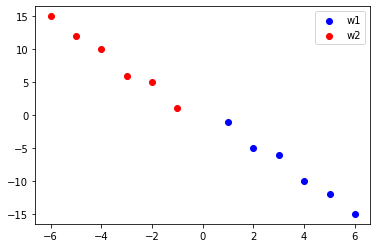

In [10]:
# before drwaing decision boundary plot the data
plt.scatter(w1[:, 0], w1[:, 1], label='w1',c='blue')
plt.scatter(w2[:, 0], w2[:, 1], label='w2',c='red')
plt.legend()
plt.show()

## Step 1: Calculate the mean 

In [11]:
# calculating the mean
m1 = np.mean(w1, axis=0)
m2 = np.mean(w2, axis=0)
# displaying the mean
print("The means of 2 classes are: ",m1,m2)

The means of 2 classes are:  [ 3.5        -8.16666667] [-3.5         8.16666667]


## Step 2: Calculate the covariance matrix

In [12]:
# calculating the covariance matrix
cov_1 = np.cov(w1.T)
cov_2 = np.cov(w2.T)
print('Covariance matrix of 2 classes are:\n', cov_1,'\n\n', cov_2)


Covariance matrix of 2 classes are:
 [[ 3.5        -9.5       ]
 [-9.5        26.16666667]] 

 [[ 3.5        -9.5       ]
 [-9.5        26.16666667]]


In [13]:
# calculating the inverse of the covariance matrix
inv_cov_1 = np.linalg.inv(cov_1)
inv_cov_2 = np.linalg.inv(cov_2)
print('Covariance matrix of 2 classes are:\n', inv_cov_1,'\n\n', inv_cov_2)

Covariance matrix of 2 classes are:
 [[19.625  7.125]
 [ 7.125  2.625]] 

 [[19.625  7.125]
 [ 7.125  2.625]]


## Step 3: Calculate the decision boundary

In [14]:
def decision_boundary(mu1, mu2, cov1, cov2):
    A = np.linalg.inv(cov2) - np.linalg.inv(cov1)
    B = 2 * (mu1 @ np.linalg.inv(cov1) - mu2 @ np.linalg.inv(cov2))
    C = mu2 @ np.linalg.inv(cov2) @ mu2.T - mu1 @ np.linalg.inv(cov1) @ mu1.T 
    - np.log(np.linalg.det(cov2) / np.linalg.det(cov1))
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-20, 20, 100)
    X, Y = np.meshgrid(x, y)
    Z = A[0,0]*X**2 + (A[0,1]+A[1,0])*X*Y + A[1,1]*Y**2 + B[0]*X + B[1]*Y + C
    return X, Y, Z

## Step 4: Plot the decision boundary

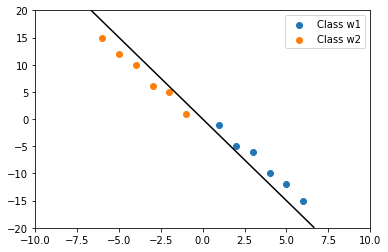

In [15]:
X, Y, Z = decision_boundary(m1, m2, cov_1, cov_2)
plt.contour(X, Y, Z, levels=[0], colors='k')
plt.scatter(w1[:,0], w1[:,1], label='Class w1')
plt.scatter(w2[:,0], w2[:,1], label='Class w2')
plt.legend()
plt.show()
                          